In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [2]:
warnings.filterwarnings('ignore')
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


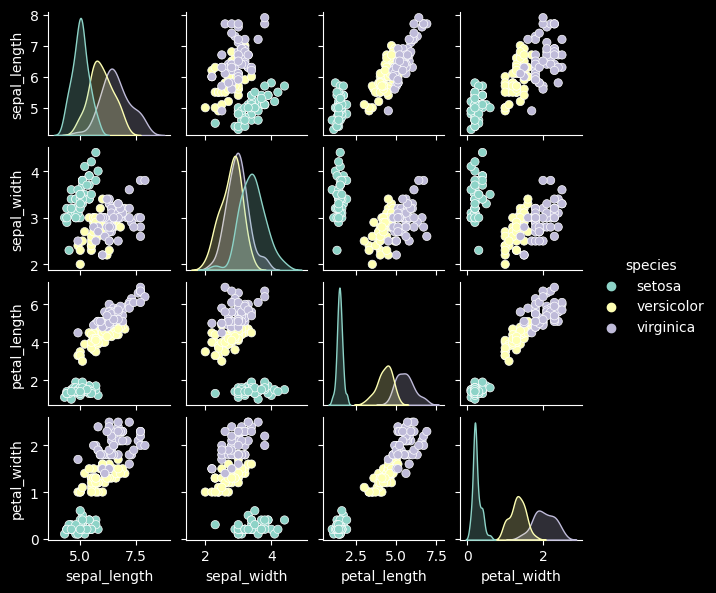

In [3]:
plt.style.use('dark_background')
sns.pairplot(iris, hue='species', height=1.5)

In [4]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
X_iris.shape, y_iris.shape

((150, 4), (150,))

In [5]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [6]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((112, 4), (38, 4), (112,), (38,))

In [7]:
X_iris.shape

(150, 4)

In [8]:
#just high level convenience...
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()                       
model.fit(Xtrain, ytrain)                 
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [9]:
#guess there is some transformation happening here
from sklearn.decomposition import PCA  
model = PCA(n_components=2)            
model.fit(X_iris)                      
X_2D = model.transform(X_iris)       

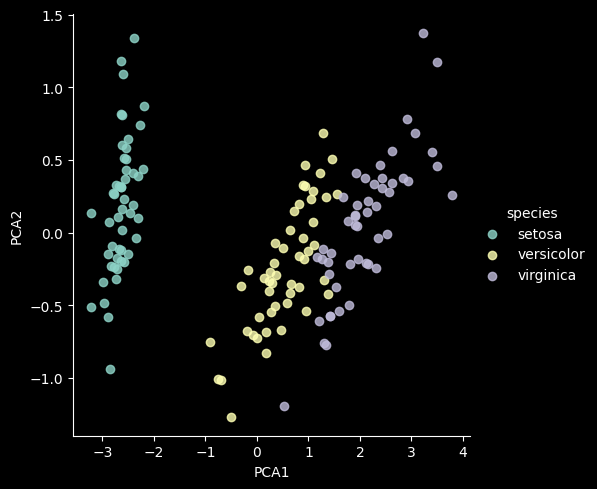

In [10]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

In [11]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')  
model.fit(X_iris)                
y_gmm = model.predict(X_iris)    

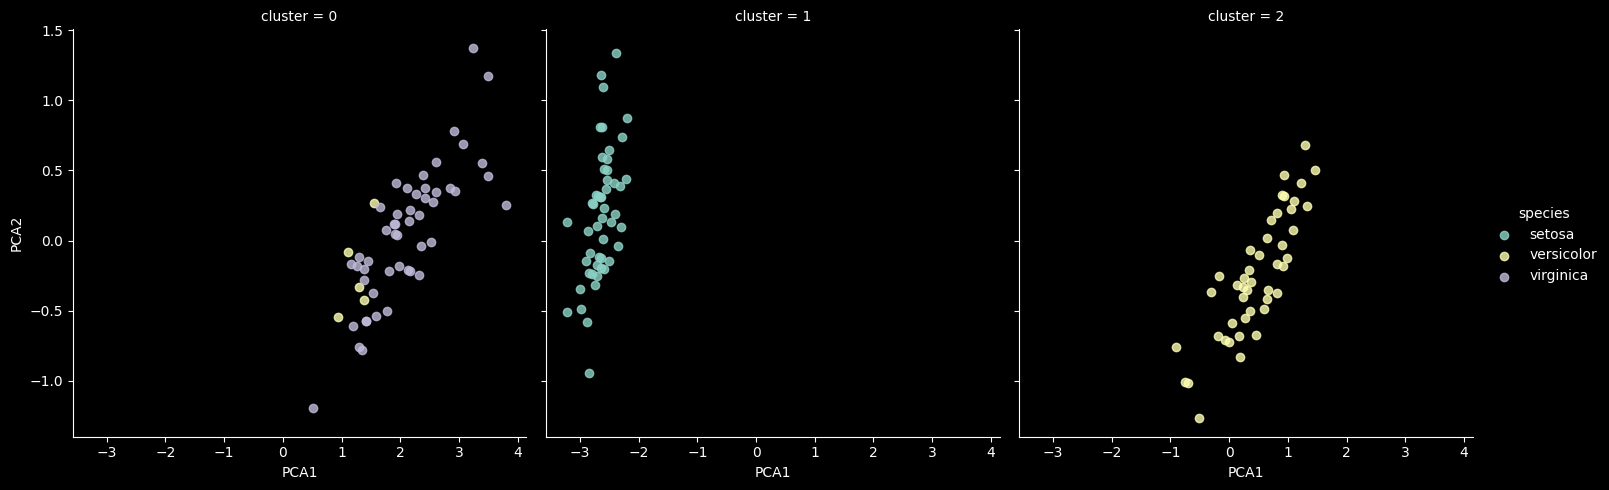

In [12]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1",y="PCA2", data=iris, hue='species', col='cluster', fit_reg=False);